In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast


from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)  if pd.notna(x) else x)

In [4]:
df[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
...,...,...
785736,Software Engineer,"[bash, python, perl, linux, unix, kubernetes, ..."
785737,Data Analyst,"[sas, sas, sql, excel]"
785738,Business Analyst,"[powerpoint, excel]"
785739,Data Engineer,"[python, go, nosql, sql, mongo, shell, mysql, ..."


In [5]:
df_exploded = df.explode('job_skills')

In [6]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()


In [7]:
df_skills_count = skills_count.reset_index(name= 'skill_count')

In [8]:
df_skills_count = df_skills_count.sort_values(by= 'skill_count', ascending= False)

In [9]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [10]:
job_title = 'Data Analyst'

top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)


In [11]:
df_skills_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


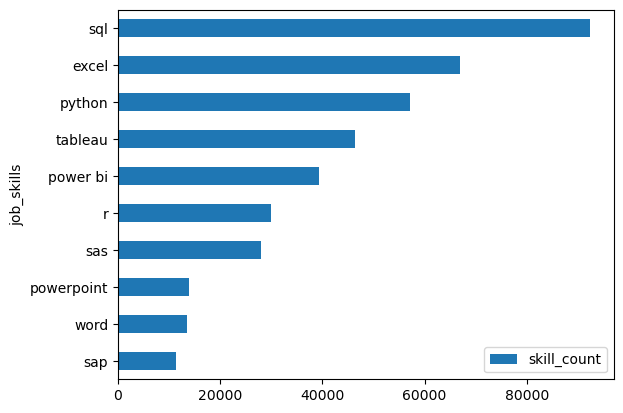

In [12]:
df_skills_final.plot(kind = 'barh', x = 'job_skills', y = 'skill_count')
plt.gca().invert_yaxis()